In [3]:
# !pip install stim~=1.14
import stim

In [4]:
print(stim.__version__)

1.15.0


In [29]:
circuit = stim.Circuit("""
R 0 1 2 3 4 5 6 7 8 
R 9 10 11 12 13 14 15 16 17 18 19 20
DEPOLARIZE1(0.001) 0 1 2 3 4 5 6 7 8

Y_ERROR(0.9) 0                                     
CX 0 9
CX 1 9
M 9
                       
CX 3 10
CX 4 10
M 10
                       
CX 6 11
CX 7 11
M 11
                       
DETECTOR(0) rec[-1] rec[-2] rec[-3]

CX 1 12
CX 2 12
M 12
                       
CX 4 13
CX 5 13
M 13
                       
CX 7 14
CX 8 14
M 14
                       
DETECTOR(1) rec[-1] rec[-2] rec[-3]
                
H 0 3 6 1 4 7 2 5 8
H 15 16 17 18 19 20 
                       
CX 15 0
CX 15 3
H 15                       
M 15
                       
CX 16 1
CX 16 4
H 16
M 16
                       
CX 17 2
CX 17 5
H 17
M 17
                       
DETECTOR(2) rec[-1] rec[-2] rec[-3]

CX 18 3
CX 18 6
H 18
M 18
                       
CX 19 4
CX 19 7
H 19
M 19
                       
CX 20 5
CX 20 8
H 20
M 20
                       
DETECTOR(3) rec[-1] rec[-2] rec[-3]
                       
          
""")

In [30]:
circuit.diagram()

q0: -R-DEPOLARIZE1(0.001)-Y_ERROR(0.9)-@-----------------------------------------------------------------------------------------------H-----------------------------------X--------------------------------------------------------------------------------------------------------------------------------------------------
                                        |                                                                                                                                   |
 q1: -R-DEPOLARIZE1(0.001)--------------|-@---------------------------------------------------------------@-----------------------------H-----------------------------------|--------------X-----------------------------------------------------------------------------------------------------------------------------------
                                        | |                                                               |                                                                 |              |
 q2: -R-DEPOLARIZE1(0.001)--------------|-|---------------------------------------------------------------|-@---------------------------H-----------------------------------|--------------|--------------X--------------------------------------------------------------------------------------------------------------------
                                        | |                                                               | |                                                               |              |              |
 q3: -R-DEPOLARIZE1(0.001)--------------|-|----------@----------------------------------------------------|-|---------------------------H-----------------------------------|-X------------|--------------|-----------------------------------------X--------------------------------------------------------------------------
                                        | |          |                                                    | |                                                               | |            |              |                                         |
 q4: -R-DEPOLARIZE1(0.001)--------------|-|----------|-@--------------------------------------------------|-|----------@----------------H-----------------------------------|-|------------|-X------------|-----------------------------------------|--------------X-----------------------------------------------------------
                                        | |          | |                                                  | |          |                                                    | |            | |            |                                         |              |
 q5: -R-DEPOLARIZE1(0.001)--------------|-|----------|-|--------------------------------------------------|-|----------|-@--------------H-----------------------------------|-|------------|-|------------|-X---------------------------------------|--------------|---------------X-------------------------------------------
                                        | |          | |                                                  | |          | |                                                  | |            | |            | |                                       |              |               |
 q6: -R-DEPOLARIZE1(0.001)--------------|-|----------|-|----------@---------------------------------------|-|----------|-|--------------H-----------------------------------|-|------------|-|------------|-|---------------------------------------|-X------------|---------------|-------------------------------------------
                                        | |          | |          |                                       | |          | |                                                  | |            | |            | |                                       | |            |               |
 q7: -R-DEPOLARIZE1(0.001)--------------|-|----------|-|----------|-@-------------------------------------|-|----------|-|----------@

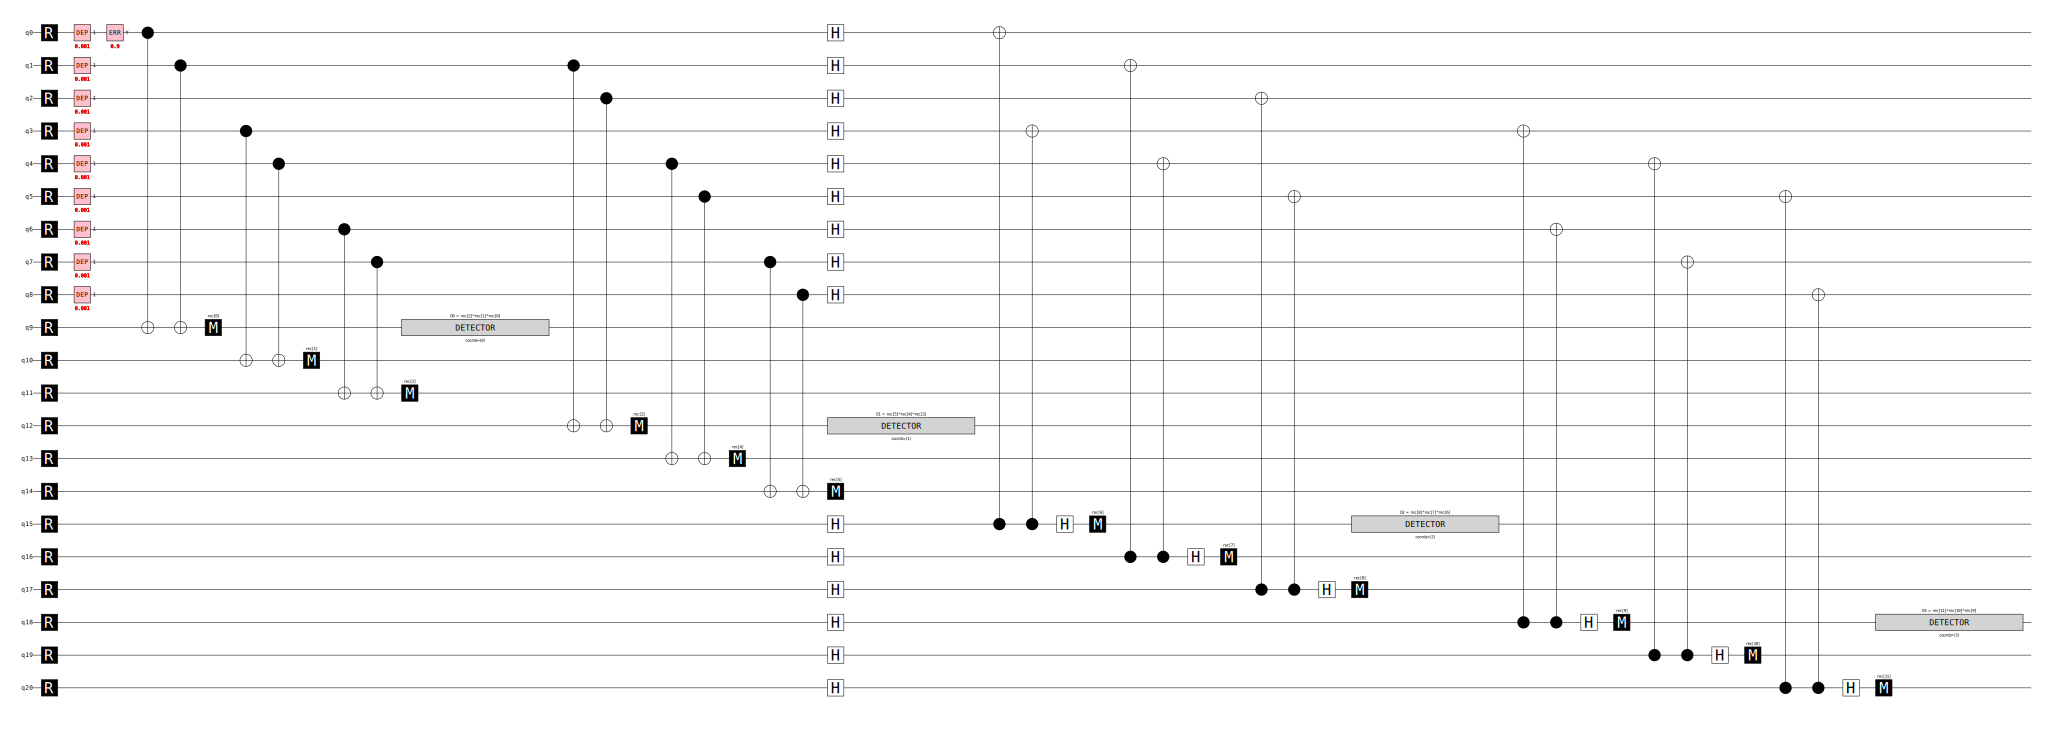

In [31]:
circuit.diagram('timeline-svg')

In [33]:
sampler = circuit.compile_detector_sampler()
print(sampler.sample(shots=5))

[[ True False  True False]
 [ True False  True False]
 [ True False  True False]
 [False False False False]
 [ True False  True False]]


In [38]:
circuit = stim.Circuit("""
R 0 1 2 3 4 5 6 7 8 
R 9 10 11 12 13 14 15 16 17 18 19 20
DEPOLARIZE1(0.001) 0 1 2 3 4 5 6 7 8

Y_ERROR(0.4) 0                                     
CX 0 9
CX 1 9
M 9
                       
CX 3 10
CX 4 10
M 10
                       
CX 6 11
CX 7 11
M 11
                       
DETECTOR(0) rec[-1] rec[-2] rec[-3]

CX 1 12
CX 2 12
M 12
                       
CX 4 13
CX 5 13
M 13
                       
CX 7 14
CX 8 14
M 14
                       
DETECTOR(1) rec[-1] rec[-2] rec[-3]
                
H 0 3 6 1 4 7 2 5 8
H 15 16 17 18 19 20 
                       
CX 15 0
CX 15 3
H 15                       
M 15
                       
CX 16 1
CX 16 4
H 16
M 16
                       
CX 17 2
CX 17 5
H 17
M 17
                       
DETECTOR(2) rec[-1] rec[-2] rec[-3]

CX 18 3
CX 18 6
H 18
M 18
                       
CX 19 4
CX 19 7
H 19
M 19
                       
CX 20 5
CX 20 8
H 20
M 20
                       
DETECTOR(3) rec[-1] rec[-2] rec[-3]
                       
          
""")

In [40]:
sampler = circuit.compile_detector_sampler()
print(sampler.sample(shots=5))

[[False False False False]
 [False False False False]
 [False False False False]
 [ True False  True False]
 [False False False False]]
